# Projet IA

## Exploration et prétraitement des données

In [1]:
# importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Chargement des données
df = pd.read_excel('dataset_02052023.xlsx')
df.head()

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26T08:17:22.852Z,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26T08:17:24.863Z,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26T08:17:25.877Z,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False


In [3]:
# Information sur le jeu de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num                   7409 non-null   int64  
 1   Timestamp             7409 non-null   object 
 2   Current_J0            7363 non-null   float64
 3   Temperature_T0        7355 non-null   float64
 4   Current_J1            7355 non-null   float64
 5   Temperature_J1        7355 non-null   float64
 6   Current_J2            7355 non-null   float64
 7   Temperature_J2        7355 non-null   float64
 8   Current_J3            7355 non-null   float64
 9   Temperature_J3        7355 non-null   float64
 10  Current_J4            7355 non-null   float64
 11  Temperature_J4        7355 non-null   float64
 12  Current_J5            7355 non-null   float64
 13  Temperature_J5        7355 non-null   float64
 14  Speed_J0              7355 non-null   float64
 15  Speed_J1             

In [4]:
df.describe()

,Num,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,...,Temperature_J5,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop
count,7409.000000,7363.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,...,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7409.000000,7355.000000
mean,3705.000000,-0.048934,34.906781,-2.297936,37.659636,-1.199381,38.064064,-0.605312,40.936999,-0.022968,...,41.891094,0.001671,0.000061,0.003791,-0.004610,-0.000810,0.002880,0.109527,141.113241,0.037797
std,2138.938405,0.829395,2.762057,0.800450,3.247315,0.609984,3.311948,0.514937,3.182399,0.630789,...,3.680003,0.148826,0.049370,0.729422,0.359999,0.038436,0.313953,0.078832,80.542340,0.190719
min,1.000000,-6.247756,27.812500,-5.808734,29.312500,-4.171966,29.375000,-3.333102,32.125000,-4.738406,...,32.000000,-0.656331,-0.330833,-2.733091,-1.271460,-0.226233,-1.629721,0.020180,1.000000,0.000000
25%,1853.000000,-0.195026,33.000000,-2.664919,35.375000,-1.552803,35.750000,-0.830933,38.937500,-0.125809,...,39.500000,-0.000483,-0.000659,-0.004100,-0.005365,-0.000120,-0.000803,0.082387,68.000000,0.000000
50%,3705.000000,-0.080830,36.500000,-2.236342,39.687500,-1.077137,40.187500,-0.571190,43.062500,-0.012325,...,44.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085192,154.000000,0.000000
75%,5557.000000,0.095959,37.062500,-1.778334,40.125000,-0.838721,40.437500,-0.388398,43.125000,0.086098,...,44.500000,0.002115,0.000540,0.000205,0.009912,0.000066,0.012924,0.089518,218.000000,0.000000
max,7409.000000,6.806938,37.250000,1.083596,40.500000,2.464940,40.937500,2.270268,43.437500,4.089389,...,44.937500,0.791929,0.615526,2.679848,1.363093,0.193914,1.378015,0.602054,264.000000,1.000000


In [5]:
# 1. Pourcentage des NA par colonne
print("Pourcentage de NA par colonne :")
print(df.isnull().mean().sort_values(ascending=False) * 100)

# 2. Pourcentage global de NA
total_na = df.isnull().sum().sum()
total_cells = df.size
global_na_percentage = (total_na / total_cells) * 100
print(f"\nPourcentage global de valeurs manquantes : {global_na_percentage:.2f}%")

Pourcentage de NA par colonne :
Temperature_T0          0.728843
Current_J2              0.728843
Temperature_J1          0.728843
Current_J1              0.728843
Temperature_J2          0.728843
Current_J4              0.728843
Temperature_J3          0.728843
Current_J3              0.728843
Speed_J2                0.728843
Speed_J3                0.728843
Speed_J4                0.728843
Temperature_J4          0.728843
Current_J5              0.728843
Temperature_J5          0.728843
Speed_J0                0.728843
Speed_J1                0.728843
Tool_current            0.728843
Robot_ProtectiveStop    0.728843
Speed_J5                0.728843
Current_J0              0.620867
Timestamp               0.000000
Num                     0.000000
cycle                   0.000000
grip_lost               0.000000
dtype: float64

Pourcentage global de valeurs manquantes : 0.60%


 
### Suppression des valeurs manquantes
Vu le faible pourcentage global de valeurs manquantes à 0.60%, nous nous sommes permis de supprimer les lignes comportant des valeurs manquantes.  

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

Num                     0
Timestamp               0
Current_J0              0
Temperature_T0          0
Current_J1              0
Temperature_J1          0
Current_J2              0
Temperature_J2          0
Current_J3              0
Temperature_J3          0
Current_J4              0
Temperature_J4          0
Current_J5              0
Temperature_J5          0
Speed_J0                0
Speed_J1                0
Speed_J2                0
Speed_J3                0
Speed_J4                0
Speed_J5                0
Tool_current            0
cycle                   0
Robot_ProtectiveStop    0
grip_lost               0
dtype: int64

### Encodage des données

Pour la colonne 'Timestamp', les valeurs suivent la nomenclature suivante : "2022-10-26T15:35:44.438Z", du format ISO 8601, qui est une norme pour représenter les dates et heures. Pour transformer sous objet datetime, nous utiliserons la fonction parser de la librairie dateutil qui permet de convertir automatiquement des chaînes de caractères en objets datetime, sans avoir besoin de préciser le format exact.

#### Colonne 'Timestamp'

In [7]:

from dateutil import parser

def custom_parser(date_str):
    try:
        return parser.parse(date_str)
    except:
        return pd.NaT

df['Timestamp'] = df['Timestamp'].apply(custom_parser)

On range les données selon l'ordre chronologique des valeurs de la colonne 'Timestamp' et réinitialiser l'index. 

In [8]:
# Tri des données par la colonne 'Timestamp' dans l'ordre chronologique
df = df.sort_values(by='Timestamp')

# Si vous voulez réinitialiser l'index après le tri (optionnel)
df = df.reset_index(drop=True)
df['Timestamp']

0      2022-10-26 08:17:21.847000+00:00
1      2022-10-26 08:17:22.852000+00:00
2      2022-10-26 08:17:23.857000+00:00
3      2022-10-26 08:17:24.863000+00:00
4      2022-10-26 08:17:25.877000+00:00
                     ...               
7350                                NaT
7351                                NaT
7352                                NaT
7353                                NaT
7354                                NaT
Name: Timestamp, Length: 7355, dtype: datetime64[ns, tzutc()]

#### Notation exponentielle des valeurs de colonnes 'Speed_J...'  
Certaines valeurs sont trop petites et semblent proches de zéro mais non nulles.

📌 Problème : Cela pourrait être du bruit numérique et peut poser des problèmes d'arrondi ou d'interprétation. 

In [9]:
df.head()

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26 08:17:21.847000+00:00,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26 08:17:22.852000+00:00,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26 08:17:23.857000+00:00,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26 08:17:24.863000+00:00,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26 08:17:25.877000+00:00,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False


### Equilibrage des données

In [10]:
# Distribution de la variable cible
print("\nDistribution de la variable cible 'Protective Stops':")
print(df['Robot_ProtectiveStop'].value_counts())
print(f"Proportion de 'Robot_ProtectiveStop' positifs: {df['Robot_ProtectiveStop'].mean():.4f}")


Distribution de la variable cible 'Protective Stops':
Robot_ProtectiveStop
0.0    7077
1.0     278
Name: count, dtype: int64
Proportion de 'Robot_ProtectiveStop' positifs: 0.0378


In [11]:
import collections 

In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter

def smote(df):
    # Séparer X (features) et y (cible)
    date = df['Timestamp']
    X = df.drop(columns=['Robot_ProtectiveStop','Timestamp'])
    y = df['Robot_ProtectiveStop']
    smote = SMOTE(sampling_strategy=0.5, random_state=42) # Ajuster le ratio
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Appliquer SMOTE
    return X_resampled, y_resampled


X_resampled, y_resampled = smote(df)

# Vérifier la nouvelle distribution
print("Après SMOTE :", Counter(y_resampled))


Après SMOTE : Counter({0.0: 7077, 1.0: 3538})


In [13]:
data = pd.concat([df['Timestamp'], X_resampled, y_resampled], axis=1)

### Corrélation et linéarité

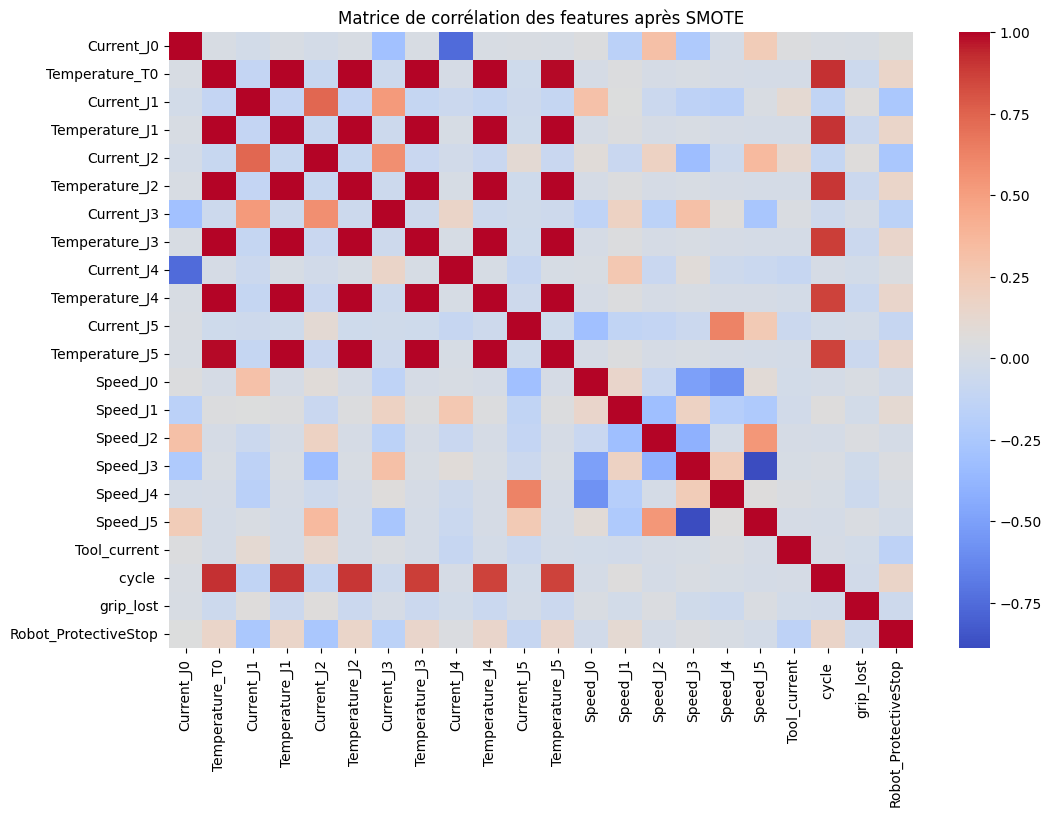

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
corr_cols = data.drop(columns=['Timestamp', 'Num'])
corr_matrix = pd.DataFrame(data, columns= corr_cols.columns).corr()

# Afficher un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des features après SMOTE")
plt.show()

La matrice de corrélation pour le projet de maintenance prédictive du cobot UR3 montre des corrélations élevées entre les **températures (T0 à T5)** et les **courants**, reflétant leur interdépendance physique, mais des corrélations faibles avec la variable cible **Robot_ProtectiveStop**. Cela indique que les arrêts de protection résultent de patterns temporels ou d’interactions complexes plutôt que d’une seule variable. La multicolinéarité entre températures et courants, les corrélations négatives entre certaines vitesses **(Speed_J0 à J5)**, et la corrélation modérée de la variable cycle avec les températures révèlent des dynamiques opérationnelles spécifiques.

Ces observations valident l’utilisation d’un modèle LSTM avec une séquence de 10 pas pour capturer les évolutions temporelles. Une réduction de dimensionnalité (ex. : garder une seule température ou utiliser PCA) et la création de features combinées (ex. : ratios courant/vitesse) pourraient optimiser le modèle. Ainsi, l’approche temporelle est pertinente, mais peut être améliorée par un prétraitement et un feature engineering ciblés.

In [15]:
# Suppression des features fortement corrélées
def remove_correlated_features(d, threshold=0.85):
    corr_matrix = df.corr().abs()
    to_drop = set()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:
                colname = corr_matrix.columns[i]
                to_drop.add(colname)

    df_filtered = df.drop(columns=to_drop)
    print(f"✅ Features supprimées (corrélation > {threshold}): {len(to_drop)}")
    return df_filtered
data_without_y = data.drop(columns=['Robot_ProtectiveStop'])
x = remove_correlated_features(data_without_y, threshold=0.85)

✅ Features supprimées (corrélation > 0.85): 9


### Sélection par variance (Variance threshold)

In [16]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold


# Sélection des features avec une variance significative
def reduction_variance(X, seuil=0.01):
    selector = VarianceThreshold(threshold=seuil)
    selected_features = selector.fit_transform(X)

    # Convertir en DataFrame avec les colonnes restantes
    selected_columns = X.columns[selector.get_support()]
    df_filtered = pd.DataFrame(selected_features, columns=selected_columns)

    print(f"✅ Features supprimées (variance < {seuil}): {X.shape[1] - df_filtered.shape[1]}")
    return df_filtered

data_without_y = data.drop(columns=['Robot_ProtectiveStop'])
# Appliquer le pipeline de sélection

x = reduction_variance(x, seuil=0.01)

print(f"📊 Nombre de features après filtrage final : {x.shape}")


✅ Features supprimées (variance < 0.01): 3
📊 Nombre de features après filtrage final : (7355, 12)


In [17]:
data = pd.concat([df['Timestamp'], x], axis=1)

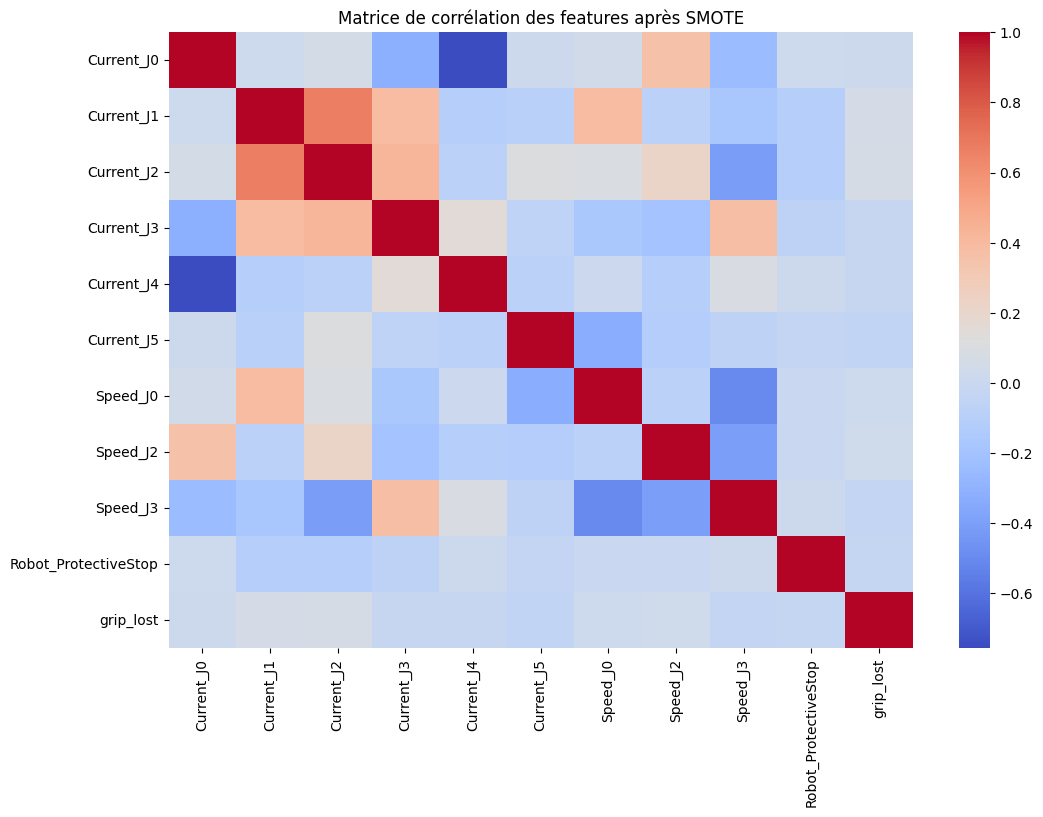

In [18]:
# Calculer la matrice de corrélation
corr_cols = data.drop(columns=['Timestamp', 'Num'])
corr_matrix = pd.DataFrame(data, columns= corr_cols.columns).corr()

# Afficher un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des features après SMOTE")
plt.show()

Les données que nous avons sont donc non corrélées et indépendantes après sélection par variance threshold. 

### Standardisation/ Normalisation
Pour effectuer le choix judicieux, nous avons visualiser les distributions des features. 

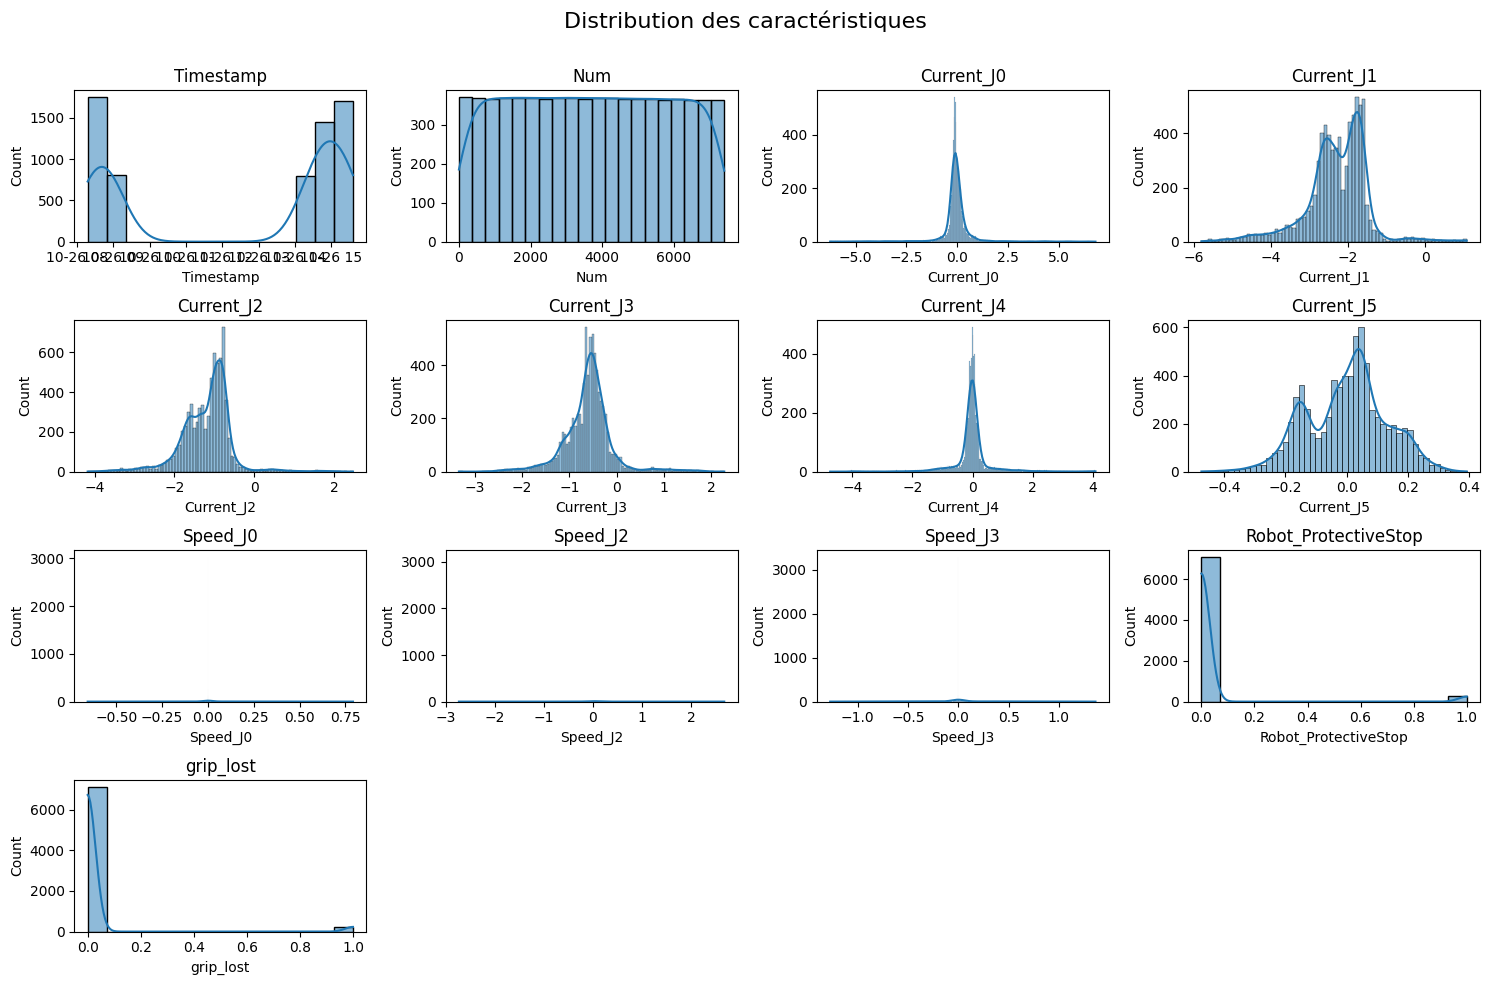

In [19]:
# Visualisation de la distribution des variables

def vizualise_distribution(df):
    plt.figure(figsize=(15, 10))
    plt.suptitle('Distribution des caractéristiques', fontsize=16)

    # Nombre de sous-graphiques
    n_cols = 4
    n_rows = (len(df.columns) - 1) // n_cols + 1

    for i, col in enumerate(df.columns):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(col)
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)

    
    plt.show()

vizualise_distribution(data)


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Assurons-nous que data contient toutes les colonnes nécessaires
print("Colonnes dans data:", data.columns.tolist())

Colonnes dans data: ['Timestamp', 'Num', 'Current_J0', 'Current_J1', 'Current_J2', 'Current_J3', 'Current_J4', 'Current_J5', 'Speed_J0', 'Speed_J2', 'Speed_J3', 'Robot_ProtectiveStop', 'grip_lost']


### Création des séquences temporelles

In [21]:
def create_sequences(data, target_col, sequence_length=10):
    """
    Crée des séquences de longueur sequence_length à partir des données 
    et associe chaque séquence à une valeur cible.
    """
    X, y = [], []
    for i in range(len(data) - sequence_length):
        # Séquence des caractéristiques (toutes les colonnes sauf la cible)
        seq = data.iloc[i:i+sequence_length].drop(columns=[target_col, 'Timestamp']).values
        # Valeur cible correspondante (valeur à l'instant t+sequence_length)
        target = data.iloc[i+sequence_length][target_col]
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)


In [22]:
# Préciser la colonne cible correcte
target_col = 'Robot_ProtectiveStop'  # Utilisez le nom exact de votre colonne cible
features = data.columns.drop([target_col, 'Timestamp']).tolist()

# Normalisation des données - uniquement les features, pas la cible ni le timestamp
scaler = StandardScaler()
df_scaled = data.copy()
df_scaled[features] = scaler.fit_transform(data[features])

Definition des sequences temporelles pour les donnees du LSTM

In [23]:
# Création des séquences
print("\nCréation des séquences temporelles...")
X, y = create_sequences(df_scaled, target_col, sequence_length=10)
print(f"Forme de X (séquences): {X.shape}")
print(f"Forme de y (cibles): {y.shape}")


Création des séquences temporelles...
Forme de X (séquences): (7345, 10, 11)
Forme de y (cibles): (7345,)


## Développement et entraînement des modèles


In [24]:
# Division simple en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nEnsemble d'entraînement: {X_train.shape[0]} échantillons")
print(f"Ensemble de test: {X_test.shape[0]} échantillons")

# Sauvegarde des données prétraitées
#np.save('X_train.npy', X_train)
#np.save('y_train.npy', y_train)
#np.save('X_test.npy', X_test)
#np.save('y_test.npy', y_test)


Ensemble d'entraînement: 5876 échantillons
Ensemble de test: 1469 échantillons


In [25]:
# Sauvegarde du scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')
print("\nPrétraitement terminé. Données prêtes pour l'entraînement du modèle.")


Prétraitement terminé. Données prêtes pour l'entraînement du modèle.


In [26]:
# Analyse de la distribution de la cible dans les ensembles d'entraînement, validation et test
print(f"\nDistribution de la cible dans l'ensemble d'entraînement: {np.mean(y_train):.4f}")
print(f"Distribution de la cible dans l'ensemble de test: {np.mean(y_test):.4f}")


Distribution de la cible dans l'ensemble d'entraînement: 0.0376
Distribution de la cible dans l'ensemble de test: 0.0388


In [27]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\jawus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
!pip install wandb
import wandb



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\jawus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
pip install wandb --upgrade

### 1. Définition du modèle


On va parametrer les differentes couches de notre modele LSTM


In [ ]:
seq_length=10
nombre_feature = 11
dropout_rate = 0.2 #dropout_rate (float): Taux de dropout pour éviter le surapprentissage
lstm_units =50 #Nombre d'unités dans les couches LSTM

# Architecture du modèle LSTM
def create_lstm_model(lstm_units=50, dropout_rate=0.2):
    model = Sequential()
    
    # Première couche LSTM avec return_sequences=True pour empiler une autre couche LSTM
    model.add(LSTM(units=lstm_units, 
                  return_sequences=True, 
                  input_shape=(seq_length, nombre_feature),
                  name='lstm_layer_1'))
    model.add(Dropout(dropout_rate))
    
    # Deuxième couche LSTM
    model.add(LSTM(units=lstm_units, name='lstm_layer_2'))
    model.add(Dropout(dropout_rate))
    
    # Vérifier si c'est un problème binaire ou multiclasse
    num_classes = len(np.unique(y_train))
    if num_classes == 2:
        model.add(Dense(units=1, activation='sigmoid'))
        loss_function = 'binary_crossentropy'
    else:
        model.add(Dense(units=num_classes, activation='softmax'))
        loss_function = 'sparse_categorical_crossentropy'
    
    # Compilation du modèle
    model.compile(
        optimizer='adam',  # Optimiseur Adam (peut être ajusté)
        loss=loss_function,  # Fonction de perte pour classification binaire
        metrics=['accuracy']  # Métrique principale
    )
    
    return model

# Création du modèle
model = create_lstm_model(lstm_units=lstm_units, dropout_rate=dropout_rate)

# Affichage du résumé du modèle pour vérification
model.summary()



SyntaxError: invalid syntax. Perhaps you forgot a comma? (3645749335.py, line 33)

### 2. Entraînement du LSTM

Le CPU n'etant pas forcement disponible, il est plus prudent d'ajouter l'option GPU pour un entrainement rapide du modele

In [ ]:
# Configuration de Weights & Biases pour le suivi des expériences

import wandb
from wandb.integration.keras import WandbMetricsLogger
wandb.login()
wandb.init(project="UR3-Cobot-Protective-Stops", name="LSTM-Base-Model", reinit=True)

# Configuration du run WandB
config = {
    "model_type": "LSTM",
    "lstm_layers": 2,
    "lstm_units": lstm_units,
    "dropout_rate": dropout_rate,
    "optimizer": "adam",
    "batch_size": 32,
    "epochs": 10,
    "sequence_length": seq_length,
    "features": nombre_feature
}
wandb.config.update(config)

# Entraînement du modèle (avec GPU si disponible)
try:
    # Tentative d'utilisation du GPU
    with tf.device('/GPU:0'):
        history = model.fit(
            X_train, y_train,
            epochs=10,
            batch_size=32,
            validation_data=(X_test, y_test),
            callbacks=[WandbMetricsLogger()]
        )
        print("Entraînement effectué sur GPU")
except:
    # Fallback sur CPU si le GPU n'est pas disponible
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[WandbMetricsLogger()]
    )
    print("Entraînement effectué sur CPU")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: jawusounouvou (jawusounouvou-ecole-centrale-casablanca) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Currently logged in as: jawusounouvou (jawusounouvou-ecole-centrale-casablanca) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.
wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.


Epoch 1/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 7:30 2s/step - accuracy: 0.3438 - loss: 0.7143 ━━━━━━━━━━━━━━━━━━━━ 7:30 2s/step - accuracy: 0.3438 - loss: 0.714 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6188 - loss: 0.6805 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6188 - loss: 0.680 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6940 - loss: 0.66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6940 - loss: 0.66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7531 - loss: 0.63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7531 - loss: 0.63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7862 - loss: 0.60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7862 - loss: 0.60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8148 - loss: 0.56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8148 - loss: 0.56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8348 - loss: 0.52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8348 - loss: 0.52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8470 - loss: 0.5

### 3. Evaluation du modèle

In [ ]:
# Évaluer le modèle

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 0.0287 1/46 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 0.028 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9620 - loss: 0.0946 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9620 - loss: 0.094 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9617 - loss: 0.09 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9617 - loss: 0.09 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9617 - loss: 0.0988
46/46Loss: 0.098610632121562 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9617 - loss: 0.0988
Test Loss: 0.09861063212156296
Test Accuracy: 0.9625595808029175

Test Accuracy: 0.9625595808029175


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

# Prédictions sur l'ensemble de test
y_pred_prob = model.predict(X_test)
y_pred_classes = (y_pred_prob > 0.5).astype("int32")

# Rapport de classification détaillé
report = classification_report(y_test, y_pred_classes)
print("\nRapport de classification:")
print(report)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.tight_layout()

# Sauvegarder l'image de la matrice de confusion
plt.savefig("conf_matrix.png")
plt.close()

# Enregistrement des métriques dans WandB
wandb.log({
    "test_loss": loss,
    "test_accuracy": accuracy,
    "classification_report_text": report,  # En texte brut
    "confusion_matrix": wandb.Image("conf_matrix.png")  # Image enregistrée
})


46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step 1/46 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Rapport de classification:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1412
         1.0       0.53      0.32      0.40        57

    accuracy                           0.96      1469
   macro avg       0.75      0.65      0.69      1469
weighted avg       0.96      0.96      0.96      1469


Rapport de classification:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1412
         1.0       0.53      0.32      0.40        57

    accuracy                           0.96      1469
   macro avg       0.75      0.65      0.69      1469
weighted avg       0.96      0.96      0.96      1469



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prédictions du modèle
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Affichage
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 1/46 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy:  0.9626
Precision: 0.5294
Recall:    0.3158
F1-score:  0.3956
Accuracy:  0.9626
Precision: 0.5294
Recall:    0.3158
F1-score:  0.3956


### 4.Validation croisée

L'approche d'optimisation des hyperparamètres crée plusieurs modèles temporaires pour tester différentes configurations, puis à la fin, crée un modèle final avec les meilleurs paramètres. C'est un processus standard pour trouver la meilleure configuration avant d'implémenter l'API Flask.

In [ ]:
from sklearn.model_selection import KFold, ParameterGrid
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wandb

# Définition des hyperparamètres à tester
param_grid = {
    'lstm_units': [32, 50, 64],
    'dropout_rate': [0.2],
    'batch_size': [32, 50],
    'learning_rate': [0.01]
}

# Fonction pour créer le modèle avec un taux d'apprentissage personnalisable
def create_lstm_model(lstm_units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    
    model.add(LSTM(units=lstm_units, 
                  return_sequences=True, 
                  input_shape=(seq_length, nombre_feature),
                  name='lstm_layer_1'))
    model.add(Dropout(dropout_rate))
    
    model.add(LSTM(units=lstm_units, name='lstm_layer_2'))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Utiliser Adam avec le taux d'apprentissage spécifié
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Configuration pour la validation croisée
n_folds = 3
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Dictionnaire pour stocker les résultats
results = []

# Parcourir toutes les combinaisons d'hyperparamètres
for params in ParameterGrid(param_grid):
    print(f"\nTesting parameters: {params}")
    fold_accuracies = []
    fold_losses = []
    
    # Validation croisée
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        print(f"Fold {fold+1}/{n_folds}")
        
        # Préparation des données pour ce fold
        X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
        y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
        
        # Création et entraînement du modèle
        model = create_lstm_model(
            lstm_units=params['lstm_units'],
            dropout_rate=params['dropout_rate'],
            learning_rate=params['learning_rate']
        )
        
        # Early stopping pour éviter le surapprentissage
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
        
        history = model.fit(
            X_fold_train, y_fold_train,
            epochs=10,  # Plus d'époques car on a early stopping
            batch_size=params['batch_size'],
            validation_data=(X_fold_val, y_fold_val),
            callbacks=[early_stopping],
            verbose=1
        )
        
        # Evaluation sur les données de validation
        val_loss, val_accuracy = model.evaluate(X_fold_val, y_fold_val, verbose=0)
        fold_losses.append(val_loss)
        fold_accuracies.append(val_accuracy)
    
    # Calcul des moyennes pour ce jeu de paramètres
    mean_accuracy = np.mean(fold_accuracies)
    mean_loss = np.mean(fold_losses)
    
    # Enregistrement des résultats
    results.append({
        **params,
        'mean_val_accuracy': mean_accuracy,
        'mean_val_loss': mean_loss,
        'std_val_accuracy': np.std(fold_accuracies)
    })
    
    print(f"Mean validation accuracy: {mean_accuracy:.4f}")
    print(f"Mean validation loss: {mean_loss:.4f}")

# Convertir les résultats en DataFrame pour faciliter l'analyse
results_df = pd.DataFrame(results)
print("\nRésultats d'optimisation des hyperparamètres:")
print(results_df.sort_values('mean_val_accuracy', ascending=False))

# Trouver les meilleurs hyperparamètres
best_params = results_df.loc[results_df['mean_val_accuracy'].idxmax()]
print(f"\nMeilleurs hyperparamètres: {dict(best_params)}")

# Entraîner le modèle final avec les meilleurs hyperparamètres
final_model = create_lstm_model(
    lstm_units=int(best_params['lstm_units']),
    dropout_rate=best_params['dropout_rate'],
    learning_rate=best_params['learning_rate']
)

# Configuration de WandB pour le modèle final
wandb.init(project="UR3-Cobot-Protective-Stops", name="LSTM-Optimized-Model", reinit=True)
wandb.config.update({
    "model_type": "LSTM-Optimized",
    "lstm_layers": 2,
    "lstm_units": int(best_params['lstm_units']),
    "dropout_rate": best_params['dropout_rate'],
    "learning_rate": best_params['learning_rate'],
    "optimizer": "adam",
    "batch_size": int(best_params['batch_size']),
    "sequence_length": seq_length,
    "features": nombre_feature
})


Testing parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'lstm_units': 32}

Fold 1/3
Fold 1/3


C:\Users\jawus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 4:34 2s/step - accuracy: 0.4688 - loss: 0.6957 ━━━━━━━━━━━━━━━━━━━━ 4:34 2s/step - accuracy: 0.4688 - loss: 0.695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8213 - loss: 0.4867 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8213 - loss: 0.486 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8447 - loss: 0.44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8447 - loss: 0.44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8784 - loss: 0.37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8784 - loss: 0.37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8964 - loss: 0.33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8964 - loss: 0.33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9103 - loss: 0.30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9103 - loss: 0.30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9178 - loss: 0.28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9178 - loss: 0.28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9228 - loss: 0.2

C:\Users\jawus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


epoch/accuracy,▁▅▅▅▅▆▆▇▇█
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▄▄▃▃▂▂▁▁
epoch/val_accuracy,▄▄▄▄▁▆▆█▆▆
epoch/val_loss,██▅▄▃▂▂▂▁▁
test_accuracy,▁
test_loss,▁
classification_report_text,precis...
epoch/accuracy,0.96903
epoch/epoch,9


In [ ]:
# Entraînement du modèle final
history = final_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=int(best_params['batch_size']),
    validation_data=(X_test, y_test),
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        WandbMetricsLogger()
    ]
)

# Évaluation sur les données de test
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print(f"Test accuracy with optimized parameters: {test_accuracy:.4f}")
print(f"Test loss with optimized parameters: {test_loss:.4f}")

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4:09 2s/step - accuracy: 0.4400 - loss: 0.6989 ━━━━━━━━━━━━━━━━━━━━ 4:09 2s/step - accuracy: 0.4400 - loss: 0.698 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7650 - loss: 0.5130 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7650 - loss: 0.513 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8309 - loss: 0.41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8309 - loss: 0.41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8646 - loss: 0.35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8646 - loss: 0.35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8816 - loss: 0.32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8816 - loss: 0.32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8933 - loss: 0.29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8933 - loss: 0.29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9011 - loss: 0.28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9011 - loss: 0.28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9089 - loss: 0.2

In [ ]:
from sklearn.metrics import classification_report

# Prédictions sur X_test
y_pred_proba = final_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32").ravel()

# Rapport de classification détaillé
report = classification_report(y_test, y_pred, output_dict=True)

# Affichage clair des métriques pour la classe 1 (arrêt de protection)
print(f"\nTest accuracy with optimized parameters: {report['accuracy']:.4f}")
print(f"Precision (classe 1): {report['1.0']['precision']:.4f}")
print(f"Recall (classe 1):    {report['1.0']['recall']:.4f}")
print(f"F1-score (classe 1):  {report['1.0']['f1-score']:.4f}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 212ms/step 1/46 ━━━━━━━━━━━━━━━━━━━━ 9s 212ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Test accuracy with optimized parameters: 0.9680
Precision (classe 1): 0.6923
Recall (classe 1):    0.3158
F1-score (classe 1):  0.4337

Test accuracy with optimized parameters: 0.9680
Precision (classe 1): 0.6923
Recall (classe 1):    0.3158
F1-score (classe 1):  0.4337


In [ ]:
# Visualisation des résultats de l'optimisation
plt.figure(figsize=(12, 8))
params_to_plot = ['lstm_units', 'dropout_rate', 'batch_size', 'learning_rate']
n_params = len(params_to_plot)

for i, param in enumerate(params_to_plot):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=param, y='mean_val_accuracy', data=results_df)
    plt.title(f'Impact of {param} on Validation Accuracy')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("hyperparameter_optimization.png")
plt.close()



#### Analyse 
✅L'Accuracy a légèrement augmenté.

✅ La precision (classe 1) a nettement augmenté : le modèle fait moins de faux positifs (quand il dit "il y a un arrêt", il a plus souvent raison).

⚠️ Le recall (classe 1) n’a pas bougé : Le modèle détecte toujours aussi peu de vrais arrêts. Il reste très prudent.

✅ Le F1-score a légèrement progressé : donc un meilleur équilibre qu’avant entre recall et precision, mais recall reste le point faible

### 5. Sauvegarde du modèle

In [ ]:
# Enregistrer les métriques et visualisations dans WandB
wandb.log({
    "final_test_loss": test_loss,
    "final_test_accuracy": test_accuracy,
    "hyperparameter_optimization": wandb.Image("hyperparameter_optimization.png")
})

# Sauvegarder le modèle final
final_model.save('lstm_optimized_model.h5')
print("Modèle optimisé sauvegardé avec succès!")


# Sauvegarde du modèle pour WandB
#model_filename = "LSTM_model.pkl"
#joblib.dump(model, model_filename)

# Enregistrement du modèle dans WandB
artifact = wandb.Artifact("lstm_optimized_model.h5", type="model")
artifact.add_file("lstm_optimized_model.h5")
wandb.log_artifact(artifact)

Modèle optimisé sauvegardé avec succès!



<Artifact lstm_optimized_model.h5>

### 6. Test sur un échantillon

In [ ]:
from tensorflow.keras.models import load_model
#Chargement du modèle (pour simuler une utilisation après entraînement)
loaded_model = load_model('lstm_optimized_model.h5')

# Préparation d'un échantillon pour test
sample_sequence = X[1]  # Prendre un exemple du jeu de données
sample_sequence = sample_sequence.reshape((1, seq_length, nombre_feature))

# Prédiction
prediction_prob = loaded_model.predict(sample_sequence)
predicted_class = np.argmax(prediction_prob)

# Interprétation de la prédiction
class_names = {
    0: "Fonctionnement normal",
    1: "Arrêt de protection imminent",
}  # Classification binaire

print(f"\nPrédiction pour l'échantillon test:")
print(f"Classe prédite: {predicted_class} - {class_names.get(predicted_class)}")
print(f"Probabilités: {prediction_prob[0]}")

# Terminer la session WandB
wandb.finish()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step

Prédiction pour l'échantillon test:
Classe prédite: 0 - Fonctionnement normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step

Prédiction pour l'échantillon test:
Classe prédite: 0 - Fonctionnement normal
Probabilités: [0.00011267]
Probabilités: [0.00011267]


epoch/accuracy,▁▂▂▂▄▅▅▆██
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▆▄▄▃▃▂▂▁▁
epoch/val_accuracy,▅▅▄▅▅▅█▄▆▁
epoch/val_loss,█▄▃▁▂▃▁▂▃▄
final_test_accuracy,▁
final_test_loss,▁
epoch/accuracy,0.9823
epoch/epoch,9
epoch/learning_rate,0.01


## Intégration du modèle dans une API Flask

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np
from tensorflow.keras.models import load_model
from pyngrok import ngrok
import threading

app = Flask(__name__)

# Charger le modèle et le scaler
model = load_model('lstm_optimized_model.h5')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
scaler = joblib.load('scaler.pkl')
print("Modèle et scaler chargés avec succès")

# Déterminer dynamiquement la longueur de séquence et le nombre de caractéristiques attendus par le modèle
EXPECTED_SEQ_LENGTH = model.input_shape[1]  # Par exemple, 10
EXPECTED_FEATURES = model.input_shape[2]  # Par exemple, 11 ou 22 (vérifié dynamiquement)
print(f"Forme d'entrée attendue par le modèle : (None, {EXPECTED_SEQ_LENGTH}, {EXPECTED_FEATURES})")

# Route for the home page
@app.route('/')
def home():
    return "Bienvenue sur l'API UR3_Cobot ! Utilisez l'endpoint /predict avec une requête POST pour faire des prédictions."

# Predict route
@app.route('/predict', methods=['POST'])
def predict():
    # Check if the request Content-Type is application/json
    if request.content_type != 'application/json':
        return jsonify({'error': "Le Content-Type de la requête doit être 'application/json'."}), 415

    try:
        data = request.get_json()

        # Ensure the required 'input_data' field is in the request
        if 'input_data' not in data:
            return jsonify({'error': "Le champ 'input_data' est requis"}), 400

        # Convertir les données en tableau NumPy
        input_data = np.array(data['input_data'])  # Shape: (seq_length, num_features)

        # Vérifier le nombre de caractéristiques
        num_features = input_data.shape[1]
        if num_features != EXPECTED_FEATURES:
            return jsonify({
                'error': f"Le nombre de caractéristiques doit être {EXPECTED_FEATURES}, mais {num_features} ont été fournies."
            }), 400

        # Ajuster dynamiquement la longueur de la séquence
        seq_length = input_data.shape[0]
        if seq_length != EXPECTED_SEQ_LENGTH:
            if seq_length > EXPECTED_SEQ_LENGTH:
                # Tronquer les séquences trop longues
                input_data = input_data[:EXPECTED_SEQ_LENGTH, :]
            else:
                # Ajouter du padding (zéros) aux séquences trop courtes
                padding = np.zeros((EXPECTED_SEQ_LENGTH - seq_length, EXPECTED_FEATURES))
                input_data = np.vstack((input_data, padding))

        # Vérifier la forme après ajustement
        print(f"Forme ajustée de input_data : {input_data.shape}")  # Devrait être (EXPECTED_SEQ_LENGTH, EXPECTED_FEATURES)

        # Normaliser les données
        input_flat = input_data.reshape(-1, EXPECTED_FEATURES)  # Shape: (EXPECTED_SEQ_LENGTH, EXPECTED_FEATURES)
        normalized_data = scaler.transform(input_flat)
        reshaped_data = normalized_data.reshape(1, EXPECTED_SEQ_LENGTH, EXPECTED_FEATURES)  # Shape: (1, EXPECTED_SEQ_LENGTH, EXPECTED_FEATURES)

        # Faire la prédiction
        prediction = model.predict(reshaped_data)
        predicted_class = np.argmax(prediction, axis=1)[0]
        probability = prediction[0].tolist()

        # Retourner le résultat de la prédiction sous forme JSON
        response = {
            'prediction': int(predicted_class),
            'probability': probability
        }
        return jsonify(response), 200

    except Exception as e:
        # Gérer les erreurs et retourner un message
        return jsonify({'error': str(e)}), 400

# Run Flask in a separate thread
def run_flask():
    app.run(debug=True, host='0.0.0.0', port=5002, use_reloader=False)

# Terminer tout tunnel ngrok existant
ngrok.kill()
print("Tous les tunnels ngrok existants ont été terminés")

# Configurer ngrok avec ton authtoken
!ngrok config add-authtoken 2vN6XZtwK8zuDIVhqNcFv6WfYX7_76MhhCU15eBMoAxS8XTH2

# Créer un nouveau tunnel ngrok
public_url = ngrok.connect(5002)
print("URL publique pour accéder à l'API :", public_url)

# Start Flask in a separate thread
threading.Thread(target=run_flask).start()

Modèle et scaler chargés avec succès

Forme d'entrée attendue par le modèle : (None, 10, 11)
Tous les tunnels ngrok existants ont été terminés
Forme d'entrée attendue par le modèle : (None, 10, 11)
Tous les tunnels ngrok existants ont été terminés
Authtoken saved to configuration file: C:\Users\jawus\AppData\Local/ngrok/ngrok.yml
Authtoken saved to configuration file: C:\Users\jawus\AppData\Local/ngrok/ngrok.yml


ERROR:pyngrok.process.ngrok:t=2025-04-08T03:26:53+0200 lvl=eror msg="unable to evaluate ngrok agent binary path for symlinks" obj=tunnels.session err="CreateFile C:\\Users\\jawus\\AppData\\Local\\ngrok\\ngrok.exe: The system cannot find the file specified."


URL publique pour accéder à l'API : NgrokTunnel: "https://a5dc-41-251-254-145.ngrok-free.app" -> "http://localhost:5002"
 * Serving Flask app '__main__'
 * Debug mode: on
 NgrokTunnel: "https://a5dc-41-251-254-145.ngrok-free.app" -> "http://localhost:5002"
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5002
 * Running on http://10.100.1.98:5002

 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5002
 * Running on http://10.100.1.98:5002
INFO:werkzeug:INFO:werkzeug:Press CTRL+C to quitPress CTRL+C to quit

INFO:werkzeug:127.0.0.1 - - [08/Apr/2025 03:28:01] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [08/Apr/2025 03:28:01] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [08/Apr/2025 03:28:01] "INFO:werkzeug:127.0.0.1 - - [08/Apr/2025 03:28:01] "GET /favicon.ico HTTP/1.1GET /favicon.ico HTTP/1.1" 404 -
" 404 -
INFO:werkzeug:10.100.1.98 - - [08/Apr/2025 03:28:20] "INFO:werkzeug:10.100.1.98 - - [08/Apr/2025 03:28:20] "POST /predict HTTP/1.1POST /

Forme ajustée de input_data : (10, 11)



C:\Users\jawus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/11/1  ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  0s0s 538ms/step 538ms/s1/1  ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  1s1s 573ms/step
 573ms/step


INFO:werkzeug:10.100.1.98 - - [08/Apr/2025 03:32:07] "POST /predict HTTP/1.1" 200 -


## Conteneurisation. 
Voir les fichiers requirements.txt et Dockerfile.